<a href="https://colab.research.google.com/github/senanayake/colab-notebooks/blob/main/SafeHavenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Safe Haven Lab: From Bernoulli to Tail-Hedged Portfolios

This notebook is an interactive lab inspired by Mark Spitznagel's *Safe Haven*.

We will:

1. Start from absolute first principles of **compounding**.
2. Derive why **log-returns** and **geometric returns** matter.
3. Use **SymPy** to derive **volatility drag**.
4. Explore the **St. Petersburg wager** and why averages can mislead.
5. Simulate:
   - Arithmetic vs geometric returns
   - Sequence-of-returns risk and "Bernoulli Falls"
   - Toy Safe Haven vs all-equity portfolios
   - Kelly betting and overbetting

The goal: build a *numerical intuition* for why avoiding large drawdowns and respecting multiplicative wealth is the core of long-term investing.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sympy import symbols, log, series, Eq, simplify
from sympy import init_printing

init_printing()
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
np.random.seed(42)


## 1. The Core Premise

> Wealth evolves **multiplicatively**, not additively.  
> Large drawdowns destroy long-term compounding.  
> A portfolio with slightly lower average return but much lower volatility can **grow faster**.

We will:
- Show how a simple two-asset toy example can have higher arithmetic average return but lower final wealth.
- Use this as the intuitive foundation for everything that follows.


Portfolio A: arithmetic avg = 15.00%, geometric = 5.83%, final wealth = 176.23
Portfolio B: arithmetic avg = 10.00%, geometric = 10.00%, final wealth = 259.37


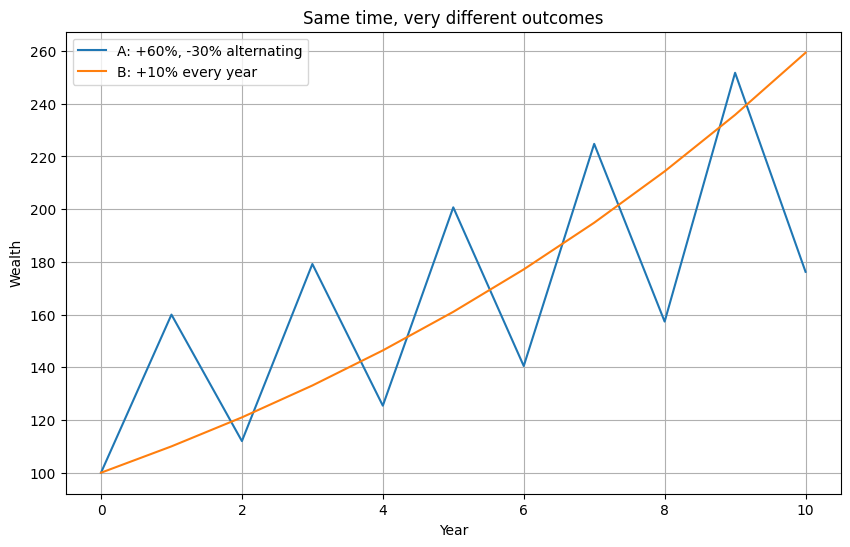

In [2]:
# Toy example: Portfolio A vs Portfolio B

years = np.arange(0, 11)

# Portfolio A: +60%, -30%, repeat
returns_A = np.array([0.60, -0.30] * 5)  # 10 years
wealth_A = [100]
for r in returns_A:
    wealth_A.append(wealth_A[-1] * (1 + r))
wealth_A = np.array(wealth_A)

# Portfolio B: +10% every year
returns_B = np.array([0.10] * 10)
wealth_B = [100]
for r in returns_B:
    wealth_B.append(wealth_B[-1] * (1 + r))
wealth_B = np.array(wealth_B)

arith_A = returns_A.mean()
arith_B = returns_B.mean()
geo_A = (wealth_A[-1] / wealth_A[0])**(1/10) - 1
geo_B = (wealth_B[-1] / wealth_B[0])**(1/10) - 1

print(f"Portfolio A: arithmetic avg = {arith_A:.2%}, geometric = {geo_A:.2%}, final wealth = {wealth_A[-1]:.2f}")
print(f"Portfolio B: arithmetic avg = {arith_B:.2%}, geometric = {geo_B:.2%}, final wealth = {wealth_B[-1]:.2f}")

plt.plot(years, wealth_A, label="A: +60%, -30% alternating")
plt.plot(years, wealth_B, label="B: +10% every year")
plt.title("Same time, very different outcomes")
plt.xlabel("Year")
plt.ylabel("Wealth")
plt.legend()
plt.grid(True)
plt.show()


## 2. Multiplicative Wealth & Bernoulli’s Insight

### 2.1 Wealth is a product of growth factors


If returns each period are $r_1, r_2, \dots, r_n$, then wealth after $n$ periods is:

$$
W_n = W_0 \prod_{t=1}^n (1 + r_t)
$$

Take logs:

$$
\ln W_n = \ln W_0 + \sum_{t=1}^n \ln(1 + r_t)
$$

Define the **average log-return**:

$$
\bar{g}_n = \frac{1}{n} \sum_{t=1}^n \ln(1 + r_t)
$$

Then:

$$
\ln W_n = \ln W_0 + n \bar{g}_n
$$

which implies

$$
W_n = W_0 \, e^{\, n \bar{g}_n}
$$

As \( n \to \infty \), by the Law of Large Numbers:

$$
\bar{g}_n \longrightarrow \mathbb{E}[\ln(1 + r)]
$$

**Key result:**

> The long-run compound growth rate is:
>
> $$
> g = \mathbb{E}[\ln(1 + r)].
> $$

This is why **log-returns** and **geometric returns** are the natural mathematical objects for understanding compounding.


## 2. Multiplicative Wealth & Bernoulli’s Insight

### 2.1 Why compounding works the way it does

When you invest money, your wealth grows by **multiplying** each period’s growth factor.

If your returns each period are:

- $r_1$ in the first year  
- $r_2$ in the second year  
- …  
- $r_n$ in the nth year  

then the amount of money you end up with after $n$ years is:

$$
W_n = W_0 (1+r_1)(1+r_2)\cdots(1+r_n)
$$

This looks complicated, but the idea is simple:

> **Each year multiplies your wealth by something.**  
> Compounding = multiplying many growth factors together.

---

### 2.2 Taking logs makes multiplication easier

Multiplying many numbers is hard.  
But there is a mathematical trick:

> **Taking a logarithm turns multiplication into addition.**

So we take the natural log of both sides:

$$
\ln W_n = \ln W_0 + \ln(1+r_1) + \ln(1+r_2) + \cdots + \ln(1+r_n)
$$

This tells us:

- Instead of multiplying many things  
- we can **add up “log-returns”**

A *log-return* is simply:

$$
\ln(1 + r)
$$

---

### 2.3 The average log-return

Let’s compute the average of these log-returns:

$$
\bar{g}_n = \frac{1}{n}\sum_{t=1}^n \ln(1+r_t)
$$

This number represents your **average growth per period**.

Now rewrite our earlier expression:

$$
\ln W_n = \ln W_0 + n \bar{g}_n
$$

This means:

- Your wealth grows exponentially (because of the log)  
- The speed of growth is controlled by $\bar{g}_n$

If we exponentiate both sides:

$$
W_n = W_0 \, e^{n\bar{g}_n}
$$

This is another way of saying:

> **Your long-term growth depends on your average log-return, not your average percentage return.**

---

### 2.4 What happens over very long periods?

As the number of years gets very large ($n \to \infty$), the average log-return settles down to a fixed value:

$$
\bar{g}_n \to \mathbb{E}[\ln(1+r)]
$$

This symbol means:

- Take the log-return every year  
- Then take the long-term average  
- That’s your true compound growth rate

We call this $g$:

$$
g = \mathbb{E}[\ln(1+r)]
$$

---

### ⭐ Why this matters

Key insights are:

1. **Wealth grows by multiplying, not adding.**
2. Multiplying many returns forces us to use **logs**.
3. Your long-term growth rate is the **average log-return**, not the simple average return.
4. This explains why volatility hurts compounding:  
   large losses reduce the log-return dramatically.

This idea is the foundation of everything else in Safe Haven investing.


### 2.2 Volatility drag: deriving $g \approx \mu - \frac{1}{2}\sigma^2$ with SymPy

We want to understand how **volatility** reduces the **compound growth rate**.

Let the simple return in one period be a random variable:

$$
r = \mu + \varepsilon
$$

where:

- $\mu$ = average (arithmetic) return  
- $\varepsilon$ = random noise with:
  - $\mathbb{E}[\varepsilon] = 0$
  - $\mathbb{E}[\varepsilon^2] = \sigma^2$ (the variance)

The long-run growth rate is based on the **expected log-return**:

$$
g = \mathbb{E}[\ln(1 + r)] = \mathbb{E}[\ln(1 + \mu + \varepsilon)].
$$

We’ll use SymPy to:

1. Expand $\ln(1 + \mu + \varepsilon)$ as a series in $\varepsilon$.  
2. Use $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\varepsilon^2] = \sigma^2$.  
3. Then expand the result for small $\mu$ to get a simple approximation.

The goal is to see the classic approximation:

$$
g \approx \mu - \frac{1}{2}\sigma^2,
$$

which shows **volatility drag**: higher $\sigma$ lowers the geometric growth rate, even if the average return $\mu$ stays the same.


In [4]:
from sympy import symbols, log, series, init_printing

init_printing()

# Define symbols
mu, eps, sigma = symbols('mu eps sigma', real=True)

# Step 1: Expand log(1 + mu + eps) in eps around eps = 0, up to eps^2
expr = log(1 + mu + eps)
expr_series = series(expr, eps, 0, 3)  # terms up to eps^2
expr_series


                             2               
              eps         eps          ⎛   3⎞
log(μ + 1) + ───── - ────────────── + O⎝eps ⎠
             μ + 1      2                    
                     2⋅μ  + 4⋅μ + 2          

## Appendix A — Why Your Wealth Grows Exponentially (Because of the Log)

### A.1 Compounding is multiplication, not addition

When you invest, your wealth doesn’t grow like:

> starting wealth + return + return + return

It grows like:

> starting wealth × (1 + return) × (1 + return) × …

If your returns each year are:

- $r_1$ in year 1  
- $r_2$ in year 2  
- …  
- $r_n$ in year $n$

and you start with $W_0$, then after $n$ years:

$$
W_n = W_0 (1 + r_1)(1 + r_2)\cdots(1 + r_n)
$$

That product is what *compounding* really is.

---

### A.2 Logs turn multiplication into addition

There is a key math trick:

> The log of a product is the sum of the logs.

Formally:

$$
\ln(ab) = \ln(a) + \ln(b)
$$

Apply this to your compounded wealth:

$$
\ln(W_n) = \ln(W_0) + \ln(1 + r_1) + \ln(1 + r_2) + \cdots + \ln(1 + r_n)
$$

Define the **log-return** in year $t$ as:

$$
g_t = \ln(1 + r_t)
$$

Then:

$$
\ln(W_n) = \ln(W_0) + \sum_{t=1}^n g_t
$$

So instead of multiplying lots of $(1 + r_t)$, we can **add up log-returns**.

---

### A.3 Average log-return = long-run growth rate

Take the average of the log-returns over $n$ years:

$$
\bar{g}_n = \frac{1}{n} \sum_{t=1}^n g_t = \frac{1}{n} \sum_{t=1}^n \ln(1 + r_t)
$$

Rewriting our equation:

$$
\ln(W_n) = \ln(W_0) + n \bar{g}_n
$$

This is a **straight line** in terms of $\ln(W_n)$:

- The “y-axis” is $\ln(W_n)$
- The “x-axis” is time $n$
- The **slope** of the line is the average log-return $\bar{g}_n$

If we solve for $W_n$ by exponentiating both sides:

$$
W_n = W_0 \, e^{\,n\bar{g}_n}
$$

This is exactly an **exponential curve** in real wealth.

---

### A.4 Over long periods

As the number of years gets large, the average log-return $\bar{g}_n$ settles down:

$$
\bar{g}_n \rightarrow \mathbb{E}[\ln(1 + r)]
$$

We usually write the long-run growth rate as:

$$
g = \mathbb{E}[\ln(1 + r)]
$$

So over very long horizons, wealth behaves like:

$$
W_n \approx W_0 \, e^{\,n g}
$$

**Key takeaway:**

> In log-space, wealth grows roughly as a straight line.  
> In normal space, that straight line turns into an exponential curve.

The slope of that line — the **average log-return** — is what really controls how fast your wealth grows. This is why things like volatility and big drawdowns (which hurt the log-return) have such a big impact on your long-term results.


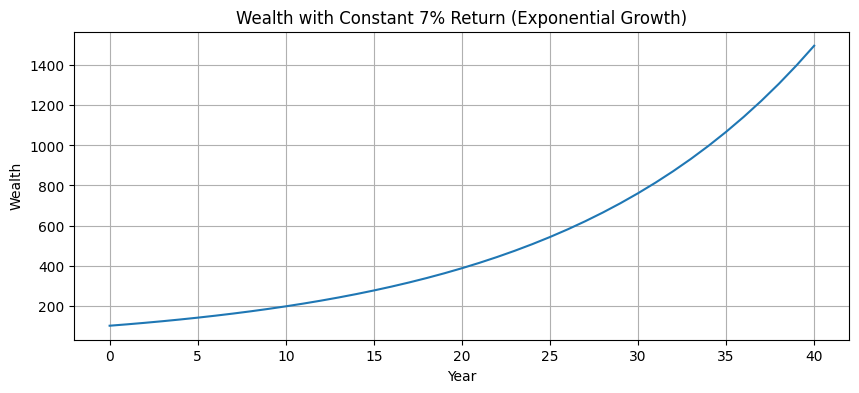

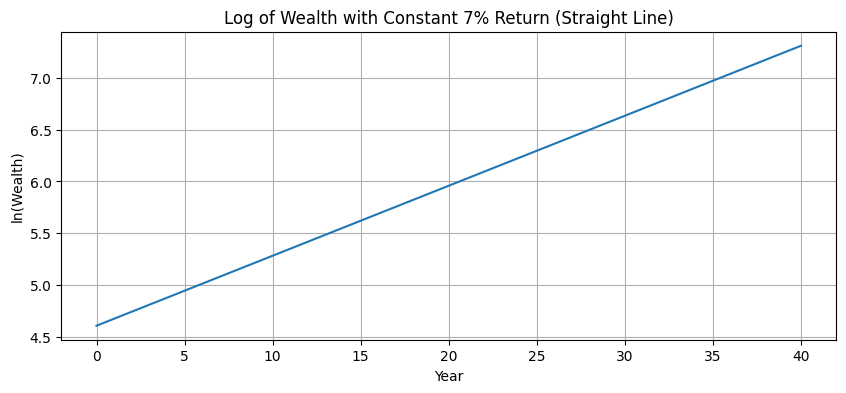

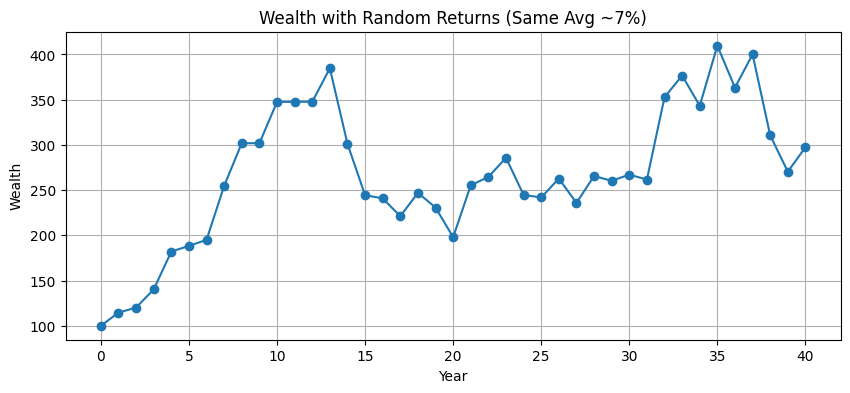

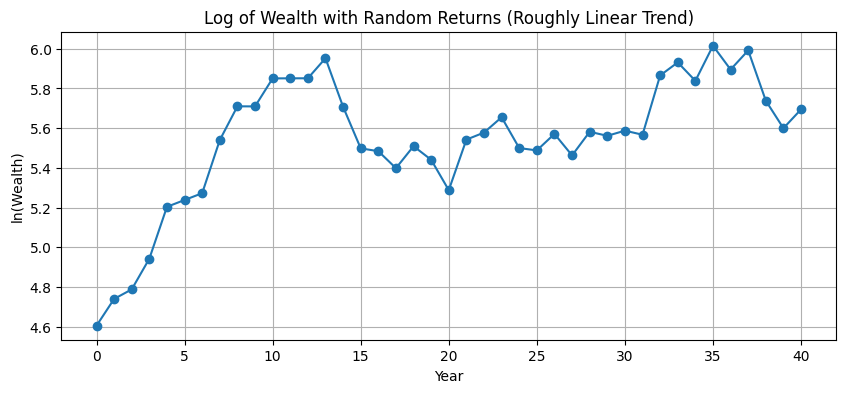

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# -----------------------------
# 1. Constant return example
# -----------------------------
years = np.arange(0, 41)  # 0 to 40 years
W0 = 100.0
r_const = 0.07  # 7% per year

wealth_const = W0 * (1 + r_const) ** years
log_wealth_const = np.log(wealth_const)

plt.figure(figsize=(10, 4))
plt.plot(years, wealth_const)
plt.title("Wealth with Constant 7% Return (Exponential Growth)")
plt.xlabel("Year")
plt.ylabel("Wealth")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(years, log_wealth_const)
plt.title("Log of Wealth with Constant 7% Return (Straight Line)")
plt.xlabel("Year")
plt.ylabel("ln(Wealth)")
plt.grid(True)
plt.show()

# -----------------------------
# 2. Random return example
# -----------------------------
n_years = 40
mu = 0.07   # average return ~7%
sigma = 0.15  # volatility 15%

# Draw random returns
rands = np.random.normal(mu, sigma, size=n_years)
wealth_rand = [W0]
for r in rands:
    wealth_rand.append(wealth_rand[-1] * (1 + r))
wealth_rand = np.array(wealth_rand)
log_wealth_rand = np.log(wealth_rand)

years_rand = np.arange(0, n_years + 1)

plt.figure(figsize=(10, 4))
plt.plot(years_rand, wealth_rand, marker="o")
plt.title("Wealth with Random Returns (Same Avg ~7%)")
plt.xlabel("Year")
plt.ylabel("Wealth")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(years_rand, log_wealth_rand, marker="o")
plt.title("Log of Wealth with Random Returns (Roughly Linear Trend)")
plt.xlabel("Year")
plt.ylabel("ln(Wealth)")
plt.grid(True)
plt.show()


## Appendix B — Why Volatility Hurts Compounding

### B.1 The key idea: compounding multiplies, not adds

When your portfolio goes up or down, your wealth changes by multiplying:

- a +10% return multiplies wealth by **1.10**
- a –10% return multiplies wealth by **0.90**
- a –50% return multiplies wealth by **0.50**
- a +50% return multiplies wealth by **1.50**

Because multiplication is asymmetric, **losing money hurts more than gaining the same amount helps**.

Example:

- Lose 50% → multiply by **0.5**
- Gain 50% → multiply by **1.5**

Start with $100:

- After –50%: $50  
- After +50%: $75  

Even though the **average return is 0%**, you lost money.

This behavior is the essence of volatility drag.

---

### B.2 Why the simple average return is misleading

Suppose a portfolio earns:

- +30% in year 1  
- –30% in year 2  

The **simple average** return is:

$$
\frac{30\% + (-30\%)}{2} = 0\%
$$

Most people would wrongly conclude:
> “My wealth should be unchanged.”

But compounding tells the truth:

$$
W = W_0 (1.3)(0.7) = 0.91W_0
$$

You **lost 9%**, even though the “average return” was zero.

This is why the arithmetic average is irrelevant.

---

### B.3 The correct measure: average log-return

Take logs of the growth factors:

- Year 1:  \(\ln(1.3)\)  
- Year 2:  \(\ln(0.7)\)

Average log-return:

$$
\bar{g} = \frac{1}{2} [\ln(1.3) + \ln(0.7)]
$$

This quantity will be **negative**, because:

- log of gains is smaller than  
- absolute log of losses

This is the mathematical expression of volatility drag.

Over the long run:

> **Your wealth grows at the average log-return,
> not the average return.**

---

### B.4 The volatility penalty formula

For moderate volatility, there is a famous approximation:

$$
g \approx \mu - \frac{1}{2}\sigma^2
$$

Where:

- \( g \) = geometric (compound) return  
- \( \mu \) = arithmetic average return  
- \( \sigma^2 \) = variance (a measure of volatility)

This shows the exact penalty:

> Higher volatility → lower geometric return  
> even if average return stays the same.

This is why a portfolio with:

- **lower volatility**  
- **small drawdowns**

can outperform one with higher returns but bigger swings.

This is the mathematical foundation behind *Safe Haven* investing.

---

### B.5 Why big losses destroy compounding

If you lose:

- 10% → need +11% to recover  
- 20% → need +25%  
- 50% → need +100%  
- 80% → need +400%  

Losses grow linearly,  
but **recoveries grow exponentially**.

This nonlinear asymmetry is built directly into log-returns.

Large losses create **deep negative log-returns**, which pull down the long-term average sharply.

This is what Spitznagel means by **Bernoulli Falls** — a point where the drawdown is so deep that recovery becomes mathematically unlikely.

---

### B.6 Summary of the principle

volatility hurts compounding because:

1. **Returns multiply, not add**
2. Log-returns measure multiplicative growth
3. Losses hurt more than equal gains help
4. The arithmetic average is meaningless for long-term growth
5. The geometric return is dragged down by volatility
6. Large drawdowns devastate future compounding

That's why:

> A portfolio with lower volatility and smaller drawdowns  
> can produce **higher long-term growth**,  
> even if its average return is lower.

This is the central mathematical justification for **Safe Haven** investing.
